<a href="https://colab.research.google.com/github/akashganesan1/Netflix-Shows-Movies-Genre-Prediction/blob/main/Netflix%20Genre%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
#@title Custom Functions
def missing_values_percentage(dataframe):
    result= (round((dataframe.isnull().sum() * 100/ len(dataframe)),2).sort_values(ascending=False))
    df_missing_values = pd.DataFrame(result,columns=['missing_percentage'])
    df_missing_values.reset_index(inplace=True)
    df_missing_values = df_missing_values.rename(columns = {'index':'column_name'})
    return df_missing_values


def deleting_columns(dataframe1,dataframe2):
    column_list = dataframe2['column_name'].to_numpy()
    for i in column_list:
        dataframe1.drop([i], axis=1)
        return dataframe1

In [3]:
#@title Data Cleaning { display-mode: "form" }
url='https://drive.google.com/file/d/1IHDr6R9SBDV8VvCdFCDOfTCaEi2vAAzW/view?usp=share_link'
url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url1)

In [4]:
missing_values_percentage(df)

,column_name,missing_percentage
0,director,29.91
1,country,9.44
2,cast,9.37
3,date_added,0.11
4,rating,0.05
5,duration,0.03
6,show_id,0.00
7,type,0.00
8,title,0.00
9,release_year,0.00


In [5]:
df = df.dropna(subset=['director'])
df = df.reset_index(drop=True)
missing_values_percentage(df)

,column_name,missing_percentage
0,cast,7.66
1,country,6.84
2,duration,0.05
3,rating,0.02
4,show_id,0.00
5,type,0.00
6,title,0.00
7,director,0.00
8,date_added,0.00
9,release_year,0.00


In [6]:
df['cast'] = df['cast'].astype(str).str.split(',')
df_temp = pd.DataFrame(df['cast'].tolist(), columns=['cast_' + str(i) for i in range(1, df['cast'].apply(len).max()+1)])
df = pd.concat([df, df_temp], axis=1)


In [7]:
df['listed_in'] = df['listed_in'].astype(str).str.split(',')
df_temp = pd.DataFrame(df['listed_in'].tolist(), columns=['genre_' + str(i) for i in range(1, df['listed_in'].apply(len).max()+1)])
df = pd.concat([df, df_temp], axis=1)


In [8]:
columns_tobe_deleted = missing_values_percentage(df)
columns_tobe_deleted 

,column_name,missing_percentage
0,cast_44,99.98
1,cast_43,99.98
2,cast_42,99.98
3,cast_41,99.97
4,cast_40,99.97
5,cast_39,99.94
6,cast_38,99.92
7,cast_37,99.92
8,cast_36,99.90
9,cast_35,99.90


In [9]:
df_missing_values = columns_tobe_deleted [columns_tobe_deleted ['missing_percentage'] > 10.0]
df_missing_values

,column_name,missing_percentage
0,cast_44,99.98
1,cast_43,99.98
2,cast_42,99.98
3,cast_41,99.97
4,cast_40,99.97
5,cast_39,99.94
6,cast_38,99.92
7,cast_37,99.92
8,cast_36,99.90
9,cast_35,99.90


In [10]:
column_list = df_missing_values['column_name'].to_numpy()
for i in column_list:
  df = df.drop([i], axis=1)

In [11]:
missing_values_percentage(df)

,column_name,missing_percentage
0,country,6.84
1,duration,0.05
2,rating,0.02
3,show_id,0.00
4,type,0.00
5,title,0.00
6,director,0.00
7,cast,0.00
8,date_added,0.00
9,release_year,0.00


In [12]:
df = df.applymap(lambda x: x.upper() if type(x) == str else x)


In [13]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_1,genre_1
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,[nan],UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,[Documentaries],"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",NAN,DOCUMENTARIES
1,S3,TV SHOW,GANGLANDS,JULIEN LECLERCQ,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[Crime TV Shows, International TV Shows, TV ...",TO PROTECT HIS FAMILY FROM A POWERFUL DRUG LOR...,SAMI BOUAJILA,CRIME TV SHOWS
2,S6,TV SHOW,MIDNIGHT MASS,MIKE FLANAGAN,"[Kate Siegel, Zach Gilford, Hamish Linklater...",NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,"[TV Dramas, TV Horror, TV Mysteries]",THE ARRIVAL OF A CHARISMATIC YOUNG PRIEST BRIN...,KATE SIEGEL,TV DRAMAS
3,S7,MOVIE,MY LITTLE PONY: A NEW GENERATION,"ROBERT CULLEN, JOSÉ LUIS UCHA","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",NaN,"SEPTEMBER 24, 2021",2021,PG,91 MIN,[Children & Family Movies],EQUESTRIA'S DIVIDED. BUT A BRIGHT-EYED HERO BE...,VANESSA HUDGENS,CHILDREN & FAMILY MOVIES
4,S8,MOVIE,SANKOFA,HAILE GERIMA,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"[Dramas, Independent Movies, International M...","ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,DRAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jab...","UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,"[Dramas, International Movies, Thrillers]",RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,DRAMAS
6169,S8803,MOVIE,ZODIAC,DAVID FINCHER,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",UNITED STATES,"NOVEMBER 20, 2019",2007,R,158 MIN,"[Cult Movies, Dramas, Thrillers]","A POLITICAL CARTOONIST, A CRIME REPORTER AND A...",MARK RUFFALO,CULT MOVIES
6170,S8805,MOVIE,ZOMBIELAND,RUBEN FLEISCHER,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",UNITED STATES,"NOVEMBER 1, 2019",2009,R,88 MIN,"[Comedies, Horror Movies]",LOOKING TO SURVIVE IN A WORLD TAKEN OVER BY ZO...,JESSE EISENBERG,COMEDIES
6171,S8806,MOVIE,ZOOM,PETER HEWITT,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",UNITED STATES,"JANUARY 11, 2020",2006,PG,88 MIN,"[Children & Family Movies, Comedies]","DRAGGED FROM CIVILIAN LIFE, A FORMER SUPERHERO...",TIM ALLEN,CHILDREN & FAMILY MOVIES


In [14]:
df.drop(['cast','listed_in'], axis=1, inplace=True)


In [15]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,cast_1,genre_1
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",NAN,DOCUMENTARIES
1,S3,TV SHOW,GANGLANDS,JULIEN LECLERCQ,NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,TO PROTECT HIS FAMILY FROM A POWERFUL DRUG LOR...,SAMI BOUAJILA,CRIME TV SHOWS
2,S6,TV SHOW,MIDNIGHT MASS,MIKE FLANAGAN,NaN,"SEPTEMBER 24, 2021",2021,TV-MA,1 SEASON,THE ARRIVAL OF A CHARISMATIC YOUNG PRIEST BRIN...,KATE SIEGEL,TV DRAMAS
3,S7,MOVIE,MY LITTLE PONY: A NEW GENERATION,"ROBERT CULLEN, JOSÉ LUIS UCHA",NaN,"SEPTEMBER 24, 2021",2021,PG,91 MIN,EQUESTRIA'S DIVIDED. BUT A BRIGHT-EYED HERO BE...,VANESSA HUDGENS,CHILDREN & FAMILY MOVIES
4,S8,MOVIE,SANKOFA,HAILE GERIMA,"UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,DRAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...
6168,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,DRAMAS
6169,S8803,MOVIE,ZODIAC,DAVID FINCHER,UNITED STATES,"NOVEMBER 20, 2019",2007,R,158 MIN,"A POLITICAL CARTOONIST, A CRIME REPORTER AND A...",MARK RUFFALO,CULT MOVIES
6170,S8805,MOVIE,ZOMBIELAND,RUBEN FLEISCHER,UNITED STATES,"NOVEMBER 1, 2019",2009,R,88 MIN,LOOKING TO SURVIVE IN A WORLD TAKEN OVER BY ZO...,JESSE EISENBERG,COMEDIES
6171,S8806,MOVIE,ZOOM,PETER HEWITT,UNITED STATES,"JANUARY 11, 2020",2006,PG,88 MIN,"DRAGGED FROM CIVILIAN LIFE, A FORMER SUPERHERO...",TIM ALLEN,CHILDREN & FAMILY MOVIES


In [16]:
df['genre_1'].nunique()

33

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


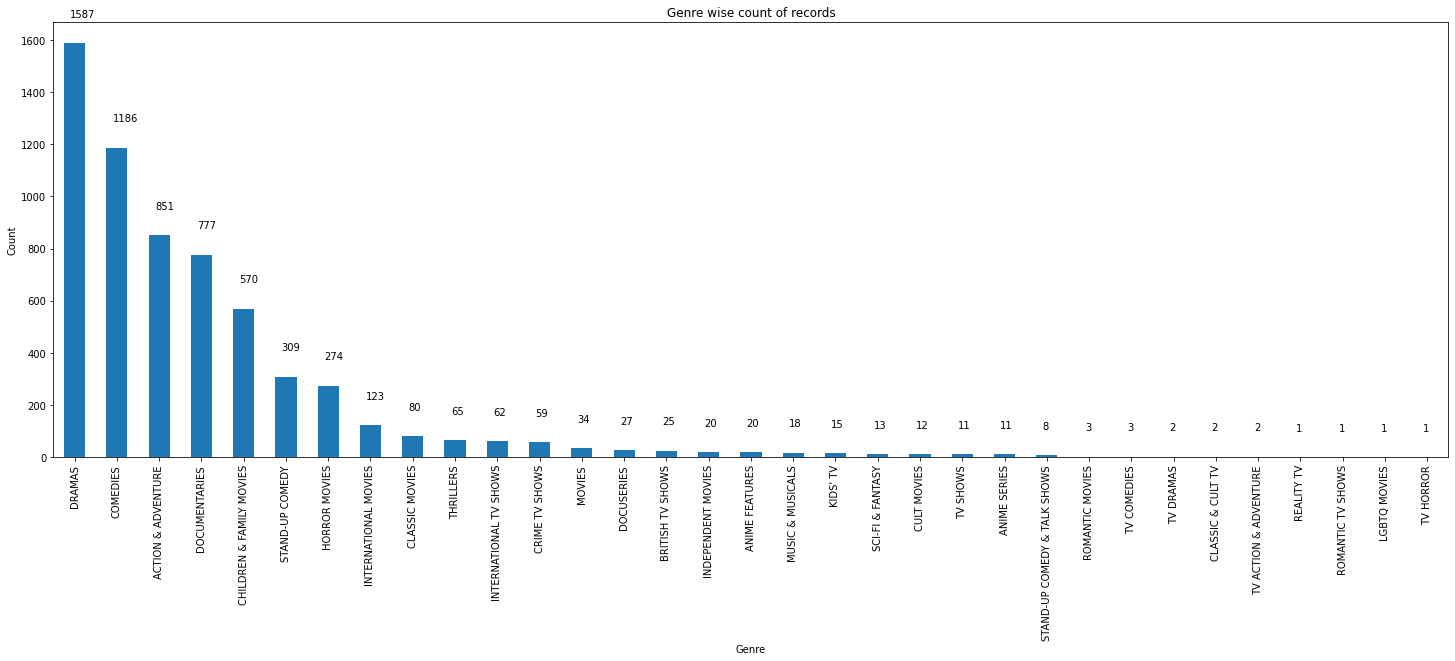

In [18]:
value_counts = df['genre_1'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()


In [19]:
# Count the values in the 'column_name' column
counts = df['genre_1'].value_counts()

# Filter the dataframe to remove rows with counts less than 200
df = df[df['genre_1'].isin(counts[counts > 200].index)]


In [20]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,cast_1,genre_1
0,S1,MOVIE,DICK JOHNSON IS DEAD,KIRSTEN JOHNSON,UNITED STATES,"SEPTEMBER 25, 2021",2020,PG-13,90 MIN,"AS HER FATHER NEARS THE END OF HIS LIFE, FILMM...",NAN,DOCUMENTARIES
3,S7,MOVIE,MY LITTLE PONY: A NEW GENERATION,"ROBERT CULLEN, JOSÉ LUIS UCHA",NaN,"SEPTEMBER 24, 2021",2021,PG,91 MIN,EQUESTRIA'S DIVIDED. BUT A BRIGHT-EYED HERO BE...,VANESSA HUDGENS,CHILDREN & FAMILY MOVIES
4,S8,MOVIE,SANKOFA,HAILE GERIMA,"UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,DRAMAS
6,S10,MOVIE,THE STARLING,THEODORE MELFI,UNITED STATES,"SEPTEMBER 24, 2021",2021,PG-13,104 MIN,A WOMAN ADJUSTING TO LIFE AFTER A LOSS CONTEND...,MELISSA MCCARTHY,COMEDIES
8,S13,MOVIE,JE SUIS KARL,CHRISTIAN SCHWOCHOW,"GERMANY, CZECH REPUBLIC","SEPTEMBER 23, 2021",2021,TV-MA,127 MIN,AFTER MOST OF HER FAMILY IS MURDERED IN A TERR...,LUNA WEDLER,DRAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...
6167,S8800,MOVIE,ZENDA,AVADHOOT GUPTE,INDIA,"FEBRUARY 15, 2018",2009,TV-14,120 MIN,A CHANGE IN THE LEADERSHIP OF A POLITICAL PART...,SANTOSH JUVEKAR,DRAMAS
6168,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,DRAMAS
6170,S8805,MOVIE,ZOMBIELAND,RUBEN FLEISCHER,UNITED STATES,"NOVEMBER 1, 2019",2009,R,88 MIN,LOOKING TO SURVIVE IN A WORLD TAKEN OVER BY ZO...,JESSE EISENBERG,COMEDIES
6171,S8806,MOVIE,ZOOM,PETER HEWITT,UNITED STATES,"JANUARY 11, 2020",2006,PG,88 MIN,"DRAGGED FROM CIVILIAN LIFE, A FORMER SUPERHERO...",TIM ALLEN,CHILDREN & FAMILY MOVIES


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [27]:
df = df[['type','director','country','rating','cast_1', 'genre_1']]

In [30]:
columns = ['type','director','country','rating','cast_1', 'genre_1']
for col in columns:
    df[col] = le.fit_transform(df[col])

<ipython-input-30-236c43c9d7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [39]:
df

,type,director,country,rating,cast_1,genre_1
0,0,2072,498,4,2295,3
3,0,3206,620,3,3289,1
4,0,1360,550,8,1778,4
6,0,3764,498,4,2147,2
8,0,719,175,8,1959,4
...,...,...,...,...,...,...
6167,0,392,206,6,2846,4
6168,0,2292,414,8,142,4
6170,0,3292,498,5,1444,2
6171,0,2940,498,3,3181,1


RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [57]:
X = df[['rating','director','country','type','cast_1']]

In [58]:
Y = df['genre_1']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [60]:
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.48244824482448245


DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [62]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43924392439243926


LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.25922592259225924


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
